# Hausaufgabe 1 (HA1): Datenanalyse
Datenquelle: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setzen Sie Methoden der deskriptiven und explorativen Datenanalyse ein, um sich mit dem Inhalt des Datensatzes vertraut zu machen.

Die Punkte in den TODOs sind Vorschläge, um Ihnen den Einstieg zu erleichtern. Schauen Sie, was davon sinnvoll umzusetzen ist und ergänzen Sie eigene Ideen.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

In [4]:
# Load data
df = pd.read_excel('ECommerce_Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# NaN Werte ermitteln
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
# NaN Werte ersetzen
for column in df:
    if df[column].dtype == object:
        continue
    # fillna() => umgang mit NaN werten
    # Inplace = True => gibt fest das dies über die Codezeile hinaus bestehen bleiben soll der Datensatz also fest verändert wird
    df[column].fillna(df[column].median(), inplace=True)

In [7]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [8]:
for column in df.columns:
    print(f"- ***{column}*** <br>Datentyp: ***{df[column].dtype}*** <br>Bedeutung: <br>Interpretation:")

- ***CustomerID*** <br>Datentyp: ***int64*** <br>Bedeutung: <br>Interpretation:
- ***Churn*** <br>Datentyp: ***int64*** <br>Bedeutung: <br>Interpretation:
- ***Tenure*** <br>Datentyp: ***float64*** <br>Bedeutung: <br>Interpretation:
- ***PreferredLoginDevice*** <br>Datentyp: ***object*** <br>Bedeutung: <br>Interpretation:
- ***CityTier*** <br>Datentyp: ***int64*** <br>Bedeutung: <br>Interpretation:
- ***WarehouseToHome*** <br>Datentyp: ***float64*** <br>Bedeutung: <br>Interpretation:
- ***PreferredPaymentMode*** <br>Datentyp: ***object*** <br>Bedeutung: <br>Interpretation:
- ***Gender*** <br>Datentyp: ***object*** <br>Bedeutung: <br>Interpretation:
- ***HourSpendOnApp*** <br>Datentyp: ***float64*** <br>Bedeutung: <br>Interpretation:
- ***NumberOfDeviceRegistered*** <br>Datentyp: ***int64*** <br>Bedeutung: <br>Interpretation:
- ***PreferedOrderCat*** <br>Datentyp: ***object*** <br>Bedeutung: <br>Interpretation:
- ***SatisfactionScore*** <br>Datentyp: ***int64*** <br>Bedeutung: <br>Inter

### TODO:

Beschreiben Sie die Daten!

* Welche Variablen gibt es und was beschreiben sie?
* Welchen Datentyp haben sie?
* Wie viele Einträge (= Kunden) gibt es?
* Wie viele verschiedene Einträge gibt es in jeder Spalte?
* Gibt es überflüssige Informationen, die entfernt werden kann?
* Gibt es fehlende Daten?
* Gibt es fehlerhafte Daten?
* Wie groß sind Mittelwert und Standardabweichung?
* Sind die Daten normalverteilt?
* ...

In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
# Welche Variablen gibt es und was beschreiben sie? 
# columns in an dataframe are the column header
for i in df.columns:
    print(i)

CustomerID
Churn
Tenure
PreferredLoginDevice
CityTier
WarehouseToHome
PreferredPaymentMode
Gender
HourSpendOnApp
NumberOfDeviceRegistered
PreferedOrderCat
SatisfactionScore
MaritalStatus
NumberOfAddress
Complain
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder
CashbackAmount


#### beschreiben der variablen
- CustomerID: Eindeutige Identifikationsnummer für Kunden.
- Churn: Analyse der Kundentreue und -abwanderung.
- Tenure: Dauer der Kundenbindung.
- PreferredLoginDevice: Bevorzugtes Anmeldegerät.
- CityTier: Kategorisierung von Stadttypen.
- WarehouseToHome: Entfernung vom Lager zum Wohnort.
- PreferredPaymentMode: Bevorzugte Zahlungsmethode.
- Gender: Geschlecht des Kunden.
- HourSpendOnApp: Durchschnittliche App-Nutzungsdauer.
- NumberOfDeviceRegistered: Anzahl der registrierten Geräte.
- PreferedOrderCat: Bevorzugte Produktkategorie.
- SatisfactionScore: Kundenzufriedenheit in Punkten.
- MaritalStatus: Familienstand des Kunden.
- NumberOfAddress: Anzahl der Lieferadressen.
- Complain: Kundenbeschwerden-Indikator.
- OrderAmountHikeFromlastYear: Prozentsatz der Bestellwertänderung im Vergleich zum Vorjahr.
- CouponUsed: Anzahl der verwendeten Coupons.
- OrderCount: Gesamtanzahl der Bestellungen.
- DaySinceLastOrder: Tage seit der letzten Bestellung.
- CashbackAmount: Betrag an erhaltenem Cashback bei Transaktionen.

In [11]:
#  Welchen Datentyp haben sie?
# Datata
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [12]:
# Wie viele Einträge (= Kunden) gibt es?
print(f"es gibt: {df['CustomerID'].count()} Kunden")

es gibt: 5630 Kunden


In [13]:
# Wie viele verschiedene Einträge gibt es in jeder Spalte?
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [14]:
# Jeden einzigartigen Wert einer Variablen ausgeben
for column_header in df.columns:
    print(f"{column_header}  <br>einzigartige Werte: {df[column_header].unique()}")

CustomerID  <br>einzigartige Werte: [50001 50002 50003 ... 55628 55629 55630]
Churn  <br>einzigartige Werte: [1 0]
Tenure  <br>einzigartige Werte: [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
PreferredLoginDevice  <br>einzigartige Werte: ['Mobile Phone' 'Phone' 'Computer']
CityTier  <br>einzigartige Werte: [3 1 2]
WarehouseToHome  <br>einzigartige Werte: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
PreferredPaymentMode  <br>einzigartige Werte: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender  <br>einzigartige Werte: ['Female' 'Male']
HourSpendOnApp  <br>einzigartige Werte: [3. 2. 1. 0. 4. 5.]
NumberOfDeviceRegistered  <br>einzigartige Werte: [3 4 5 2 1 6]
PreferedOrderCat  <br>einzigartige Werte: ['Laptop & Accessory' 'Mobile

In [15]:
print(df['CashbackAmount'].duplicated().sum())

3044


#### Gibt es überflüssige Informationen, die entfernt werden kann?
die CustomerID kann entfernt werden da diese keine Informationen bietet um den Churn zu beschreiben oder gerunde für diesen zu ermitteln.

In [16]:
df.drop('CustomerID', axis=1, inplace=True)
# axis=1 => axis ist ein Parameter in Pandas, der angibt, 
# entlang welcher Achse eine Operation 
# in einem DataFrame oder einer Series durchgeführt werden soll. 
# axis=0 bezieht sich auf die Zeilenachse, und axis=1 bezieht sich auf die Spaltenachse. 

In [17]:
# Gibt es fehlende Daten?
print(df.isnull().sum())
print("\nEs gibt fehlende Daten, die meisten daten fehlen in der Spalte DaySinceLastOrder")

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Es gibt fehlende Daten, die meisten daten fehlen in der Spalte DaySinceLastOrder


In [18]:
print(f"Es gibt: {df.duplicated().sum()} Duplikate von Zeilen")

Es gibt: 558 Duplikate von Zeilen


In [19]:
# Die Werte 'Mobile Phone' und 'Phone' der Variable 'PreferredLoginDevice' unter 'Mobile Device' zusammengeführt
df['PreferredLoginDevice'].replace(['Mobile Phone', 'Phone'], 'Mobile Device', inplace=True)

In [41]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       'COD'], dtype=object)

In [33]:
## Die Werte 'Credit Card' und 'CC' der Variable 'PreferredPaymentMode' unter 'Credit Card' zusammengeführt
df['PreferredPaymentMode'].replace(['Credit Card', 'CC'], 'Credit Card', inplace=True)

In [42]:
## Die Werte 'Cash on Delivery' und 'COD' der Variable 'PreferredPaymentMode' unter 'Cash on Delivery' zusammengeführt
df['PreferredPaymentMode'].replace(['Cash on Delivery', 'COD'], 'Cash on Delivery', inplace=True)

In [44]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [22]:
# Wie groß sind Mittelwert
print("Mittelwert der Variablen gerundet auf zwei nachkommastellen \n(Variablen die keine Zahlenwerte enthalten werden ausgeschlossen)\n")
for i in df:
    if df[i].dtype == "object":
        continue
    print(f"{i}: {round(df[i].mean(),2)}")

Mittelwert der Variablen gerundet auf zwei nachkommastellen 
(Variablen die keine Zahlenwerte enthalten werden ausgeschlossen)

Churn: 0.17
Tenure: 10.13
CityTier: 1.65
WarehouseToHome: 15.57
HourSpendOnApp: 2.93
NumberOfDeviceRegistered: 3.69
SatisfactionScore: 3.07
NumberOfAddress: 4.21
Complain: 0.28
OrderAmountHikeFromlastYear: 15.67
CouponUsed: 1.72
OrderCount: 2.96
DaySinceLastOrder: 4.46
CashbackAmount: 177.22


In [23]:
# Wie groß sind die Standartabweichungen?
print("Standartabweichung der Variablen gerundet auf zwei nachkommastellen \n(Variablen die keine Zahlenwerte enthalten werden ausgeschlossen)\n")
for i in df:
    if df[i].dtype == "object":
        continue
    print(f"{i}: {round(df[i].std(),2)}")

Standartabweichung der Variablen gerundet auf zwei nachkommastellen 
(Variablen die keine Zahlenwerte enthalten werden ausgeschlossen)

Churn: 0.37
Tenure: 8.36
CityTier: 0.92
WarehouseToHome: 8.35
HourSpendOnApp: 0.71
NumberOfDeviceRegistered: 1.02
SatisfactionScore: 1.38
NumberOfAddress: 2.58
Complain: 0.45
OrderAmountHikeFromlastYear: 3.59
CouponUsed: 1.86
OrderCount: 2.88
DaySinceLastOrder: 3.57
CashbackAmount: 49.21


In [24]:
# Normalverteilung
# Der Shapiro-Wilk-Test ist in Python mit der scipy.stats-Bibliothek verfügbar
from scipy import stats

for i in df.columns:
    print(i)
    if df[i].dtype == "object":
        continue

    stat, p = stats.shapiro(df[i])
    alpha = 0.05
    print(f'Shapiro-Wilk-Test Statistik: {stat:.50f}')
    print(f'p-Wert: {p:.50f}')
    if p > alpha:
        print('Die Daten scheinen normalverteilt zu sein.\n')
    else:
        print('Die Daten sind wahrscheinlich nicht normalverteilt.\n')

Churn
Shapiro-Wilk-Test Statistik: 0.45170503854751586914062500000000000000000000000000
p-Wert: 0.00000000000000000000000000000000000000000000000000
Die Daten sind wahrscheinlich nicht normalverteilt.

Tenure
Shapiro-Wilk-Test Statistik: 0.92282211780548095703125000000000000000000000000000
p-Wert: 0.00000000000000000000000000000000000000000000000000
Die Daten sind wahrscheinlich nicht normalverteilt.

PreferredLoginDevice
CityTier
Shapiro-Wilk-Test Statistik: 0.61993896961212158203125000000000000000000000000000
p-Wert: 0.00000000000000000000000000000000000000000000000000
Die Daten sind wahrscheinlich nicht normalverteilt.

WarehouseToHome
Shapiro-Wilk-Test Statistik: 0.85921514034271240234375000000000000000000000000000
p-Wert: 0.00000000000000000000000000000000000000000000000000
Die Daten sind wahrscheinlich nicht normalverteilt.

PreferredPaymentMode
Gender
HourSpendOnApp
Shapiro-Wilk-Test Statistik: 0.82252860069274902343750000000000000000000000000000
p-Wert: 0.0000000000000000000000

c:\Users\jakob_hh6vfus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### TODO:

Ist es sinnvoll, die Daten in anderer Form aufzubereiten?

* Normalisierung => Normalisierung kann sinn machen wenn man beabsichtigt werte von verschiedenen Variablen auf eine Skala dargestellt werden sollen
* Dummy-Kodierung => Sinnvoll, wenn man kategoriale Variablen in numerische Variablen umwandeln möchtest.
* Numerische Darstellung => Sinnvoll, wenn man textbasierte oder kategoriale Daten in numerische Darstellungen umwandeln möchte.
* Kombination mehrerer Variablen => Sinnvoll, wenn man versteckte Muster in den Daten aufdecken möchte, indem man bestehende Variablen miteinander kombiniert
* ...

### TODO:

Erstellen Sie mindestens fünf sinnvolle Visualisierungen.

* Beschreiben und interpretieren Sie die Abbildungen.
* Gibt es Ausreißer?
* ...

Churn
0    4682
1     948
Name: count, dtype: int64


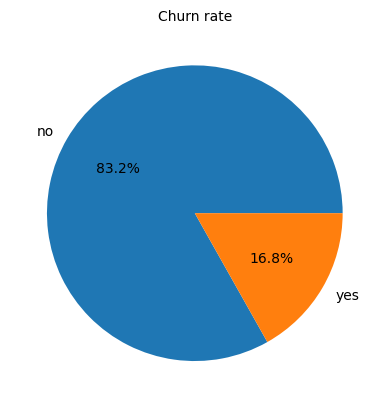

Aus dem Diagramm lässt sich ablesen das die Absprungrate sehr gering ist 
 (es wird davon ausgegangen das 0 = no Churn 1= Churn)


In [25]:
# Churn verhältnis (Abwanderungsrate)
print(df['Churn'].value_counts())

plt.pie(df['Churn'].value_counts(), labels = ("no" ,"yes"), autopct='%1.1f%%')

plt.title("Churn rate", fontsize=10)

plt.show()

print("Aus dem Diagramm lässt sich ablesen das die Absprungrate sehr gering ist \n (es wird davon ausgegangen das 0 = no Churn 1= Churn)")

In [26]:
# Fill the missing values with the avegrage...
# This is because this values are less than 10% of our dataset

df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
# inplace=True ensures the changes are permanent.

0        4
1        9
2        9
3        0
4        0
        ..
5625    10
5626    13
5627     1
5628    23
5629     8
Name: Tenure, Length: 5630, dtype: int32


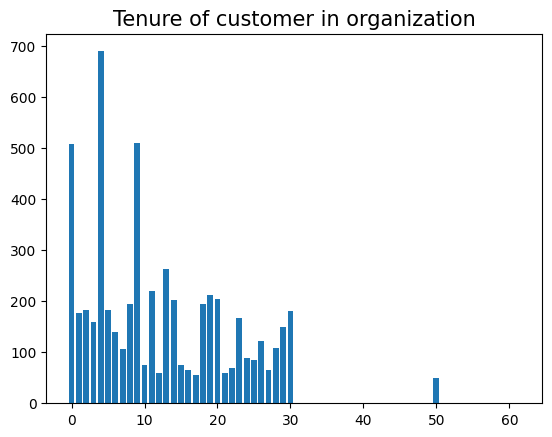

In [27]:
df['Tenure'] = df['Tenure'].astype(int)
print(df['Tenure'])
plt.bar(df['Tenure'].unique(), df['Tenure'].value_counts())
plt.title("Tenure of customer in organization", fontsize=15)
plt.show()

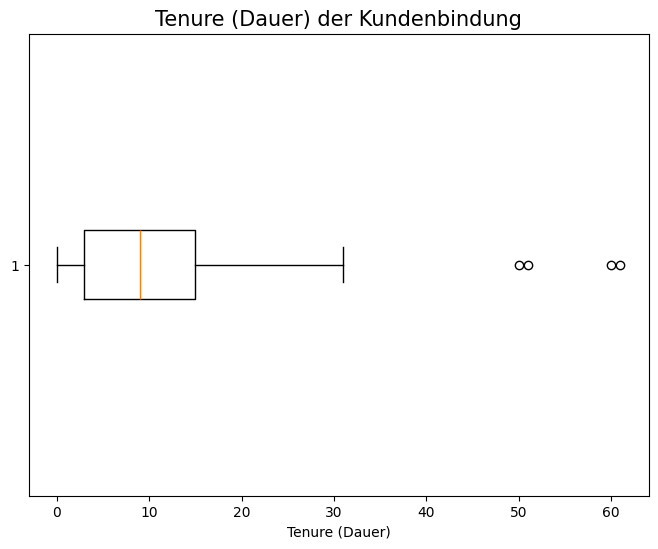

In [28]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tenure'], vert=False)  # vert=False, um den Boxplot horizontal darzustellen
plt.title("Tenure (Dauer) der Kundenbindung", fontsize=15)
plt.xlabel("Tenure (Dauer)")
plt.show()

Gender
Female    2.950134
Male      2.924350
Name: HourSpendOnApp, dtype: float64


Text(0.5, 1.0, 'Durchschnittliche Nutzungsdauer der App nach Geschlecht')

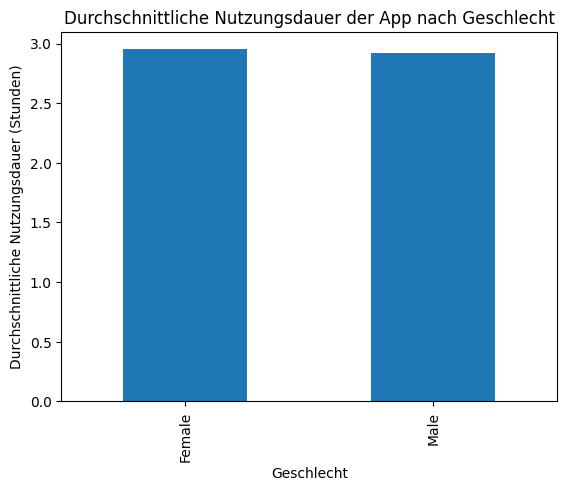

In [29]:
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)
gender_grouped = df.groupby('Gender')['HourSpendOnApp'].mean()
print(gender_grouped)
gender_grouped.plot(kind='bar')

plt.xlabel('Geschlecht')
plt.ylabel('Durchschnittliche Nutzungsdauer (Stunden)')
plt.title('Durchschnittliche Nutzungsdauer der App nach Geschlecht')

es lässt sich kein Unterschied zwischen Männlich und Weiblich bei der Nutzungsdauer der App feststellen. Beide Geschlechter Nutzen die App im Schnitt 3Std.

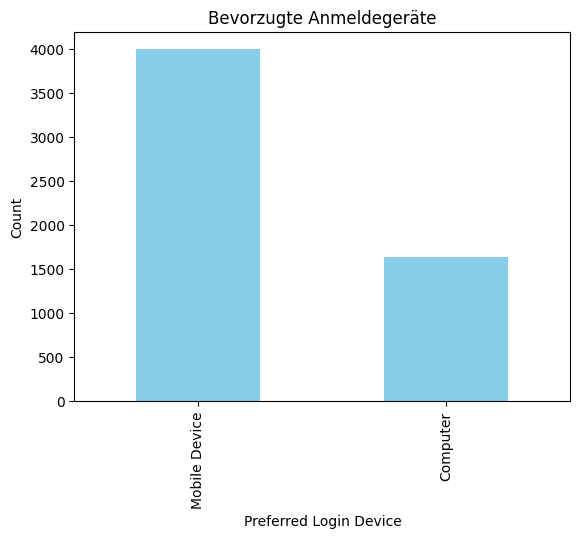

In [30]:
device_counts = df['PreferredLoginDevice'].value_counts()

# Balkendiagramm erstellen
device_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.title('Bevorzugte Anmeldegeräte')

plt.show()

Es ist zu erkennen das die meisten nutzer sich per Mobiltelefon anmelden

### TODO:

Lassen sich Zusammenhänge zwischen zwei Variablen feststellen oder vermuten?
=> ja es lässt sich vermuten das ein zusammenhang zwischen der absprungrate und der werte der Complains vorliegt

Speichern Sie den bearbeiteten Datensatz ab, sodass Sie zukünftig mit diesem weiterarbeiten können.

In [31]:
# Save dataset

df.to_csv('my_dataset.csv', index=None)